Lorenz 2005
- F = 15.0 (constant)
- observation : density=4, time frequency=50, err var=1.0
- basic ensemble size: 40
- independent ensemble size: 2000
- basic_ens loc=240, inf=1.05
- inde_ens loc=0(noloc), inf=1.05
- advance 5 y, save interval = 6h

### 1.1 loc: kg_t/kg_f

<IPython.core.display.Javascript object>


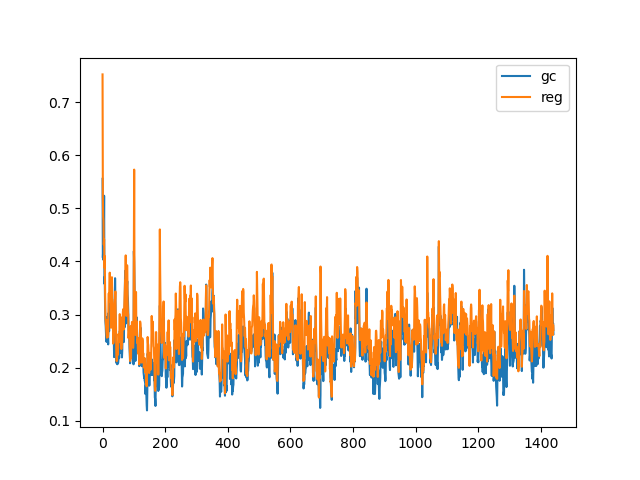

In [19]:
%matplotlib notebook
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt


rmse_gc = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/4040/reg/advance/distance_only/debug_481/analy_rmse_gc240.npy')
rmse_reg = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/4040/reg/advance/distance_only/debug_481/analy_rmse_reg.npy')

model_size = 960
nobstime = 1441
xx = range(nobstime)
plt.plot(xx, rmse_gc, label='gc')
plt.plot(xx, rmse_reg, label='reg')
plt.legend()
# plt.ylim(0,0.0005)
plt.show()


<IPython.core.display.Javascript object>


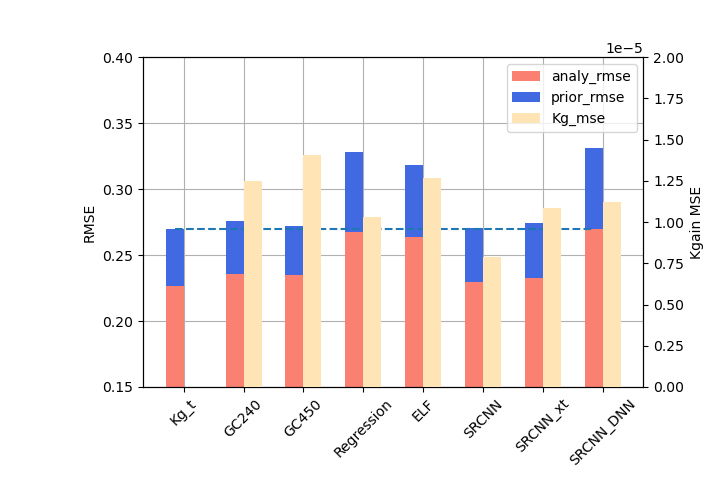

In [66]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


columns = ('Kg_t', 'GC240', 'GC450', 'Regression', 'ELF','SRCNN','SRCNN_xt','SRCNN_DNN')
colors = ['salmon', 'royalblue']
labels = ['analy_rmse','prior_rmse']

gainmse = np.array([0, 1.248E-05, 1.405E-05, 1.033E-05, 1.268E-05, 7.913E-06, 1.085E-05, 1.119E-05])

data = np.array([[0.226774, 0.235484, 0.235000, 0.267683, 0.263531, 0.229852, 0.232995, 0.269520],
        [0.269421, 0.275636, 0.271753, 0.328089, 0.318180, 0.270162, 0.274439, 0.330872]])


# Get some pastel shades for the colors
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.3

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(index, np.tile(data[1,0],(len(index),1)),'--', zorder=6)
bars = []
data[1,:] = data[1,:] - data[0,:]
for row in range(n_rows):
    bars.append(ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row], label=labels[row], zorder=row+2))
    y_offset = y_offset + data[row]

ax2 = ax.twinx()
bars.append(ax2.bar(index+0.3, gainmse, bar_width, color='moccasin', label='Kg_mse', zorder=3))

ax.grid(zorder=0)
ax.set_ylim(0.15,0.4)
ax2.set_ylim(0,2E-5)
labs = [bar.get_label() for bar in bars]
ax.legend(bars, labs, loc=0)
ax.set_xticks(index+0.15)
ax.set_xticklabels( columns, rotation=45)
ax.set_ylabel('RMSE')
ax2.set_ylabel('Kgain MSE')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.show()
plt.savefig('methods_compare.png')


### 1D Distance Dependent

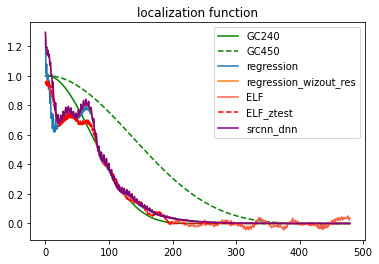

In [107]:
%matplotlib inline
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
CMat = construct_GC_2d(240, model_size, obs_grids)
CMat450 = construct_GC_2d(450, model_size, obs_grids)
loc_size = int(model_size/2)

beta = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/reg_loc_beta.npy')
eps = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/reg_loc_eps.npy')
beta_1 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/without_res/reg_loc_beta.npy')
# ai_loc = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/0layer/equal/ai_loc.npy')
elf = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/debug_481/elf.npy')
elf_ztest = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/debug_481/elf_ztest.npy')
# elf_on_gc450 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/based_on_gc450/elf_check.npy')
srcnn_dnn = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_Kg_t/SRCNN_DNN/distance_only/debug_481/loc_srcnn_dnn.npy')

plt.plot(range(loc_size), CMat[0, 0:loc_size], color='g',label='GC240')
plt.plot(range(loc_size), CMat450[0, 0:loc_size], color = 'g', ls='--',label='GC450')
plt.plot(range(loc_size), beta[0:-1], label='regression')
plt.plot(range(loc_size), beta_1[0:-1], label='regression_wizout_res')
plt.plot(range(loc_size), elf[0:-1], color='tomato', label='ELF')
plt.plot(range(loc_size), elf_ztest[0:-1], color='r', ls='--', label='ELF_ztest')
# plt.plot(range(loc_size), elf_on_gc450, color = 'peru', label='ELF_GC450')
plt.plot(range(loc_size), srcnn_dnn[0:loc_size], color = 'purple', label='srcnn_dnn')
# plt.plot(range(model_size), ai_loc[200,:,:], label='NN')
plt.title('localization function')
plt.legend()
plt.show()


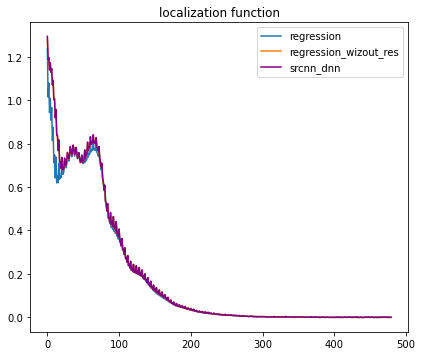

In [17]:
%matplotlib inline
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
CMat = construct_GC_2d(240, model_size, obs_grids)
CMat450 = construct_GC_2d(450, model_size, obs_grids)
loc_size = int(model_size/2)

beta = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/reg_loc_beta.npy')
beta_1 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/without_res/reg_loc_beta.npy')
srcnn_dnn = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_Kg_t/SRCNN_DNN/distance_only/debug_481/loc_srcnn_dnn.npy')

plt.plot(range(loc_size), beta[0:-1], label='regression')
plt.plot(range(loc_size), beta_1[0:-1], label='regression_wizout_res')
plt.plot(range(loc_size), srcnn_dnn[0:loc_size], color = 'purple', label='srcnn_dnn')

# plt.xlim(0,20)
# plt.ylim(1,1.5)
plt.title('localization function')
plt.legend()
plt.subplots_adjust(top=1.2,right=1)# show the figure
plt.show()


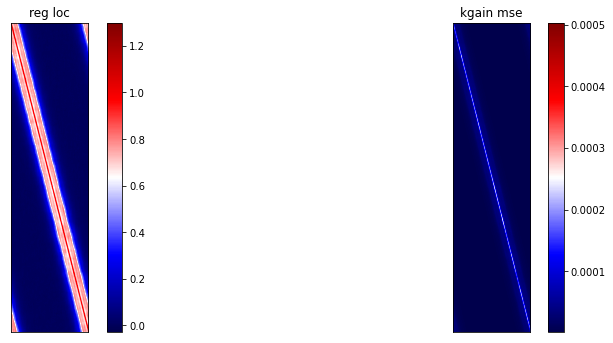

reg 2d Kgain mse: 1.0350312432973337e-05


In [97]:
%matplotlib inline
from matplotlib import colors

reg_2d = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/2d/reg_2d_beta.npy')
mse_reg_2d = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/2d/mse_reg_2d.npy')

width = 2
height = 1
ix = 1
images = []

ax = plt.subplot(height, width, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('reg loc')
images.append(ax.imshow(reg_2d, cmap=plt.cm.seismic))
plt.colorbar(images[0], orientation='vertical', fraction=.3)        

ax = plt.subplot(height, width, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('kgain mse')
images.append(ax.imshow(mse_reg_2d, cmap=plt.cm.seismic))

# vmin = min(image.get_array().min() for image in images)
# vmax = max(image.get_array().max() for image in images)
# norm = colors.Normalize(vmin=vmin, vmax=0.01)
# for im in images:
#     im.set_norm(norm)    

plt.colorbar(images[1], orientation='vertical', fraction=.3)        
plt.subplots_adjust(top=1.2,right=2)# show the figure

# show the figure
plt.show()

print('reg 2d Kgain mse:', np.mean(mse_reg_2d))

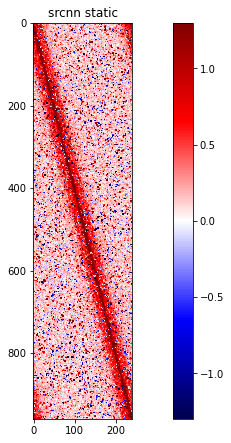

In [11]:
%matplotlib inline
srcnn_mean = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_Kg_t/SRCNN_Dong/kg_no_shift/static/loc_srcnn.npy')
# srcnn_mean = np.mean(srcnn_mean, axis=1)
plt.imshow(srcnn_mean, cmap=plt.cm.seismic, vmin=-1.3, vmax=1.3)
plt.colorbar()
plt.title('srcnn static')
plt.subplots_adjust(top=1.5,right=2)# show the figure
plt.show()

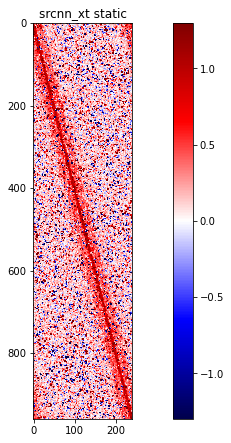

In [12]:
%matplotlib inline
srcnn_mean = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_xt/SRCNN_Dong/static/loc_srcnn.npy')
# srcnn_mean = np.mean(srcnn_mean, axis=1)
plt.imshow(srcnn_mean, cmap=plt.cm.seismic, vmin=-1.3, vmax=1.3)
plt.colorbar()
plt.title('srcnn_xt static')
plt.subplots_adjust(top=1.5,right=2)# show the figure
plt.show()

In [113]:
srcnn_mean.min()

-99665.63615009106

<IPython.core.display.Javascript object>


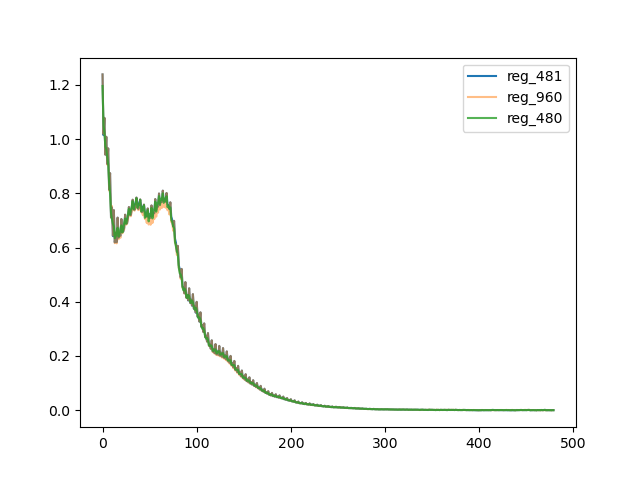

In [34]:
%matplotlib notebook
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
CMat = construct_GC_2d(240, model_size, obs_grids)

beta960 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/reg_loc_beta.npy')
beta480 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/reg_loc_beta.npy')
beta481 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/reg_loc_beta.npy')
# ai_loc = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/0layer/equal/ai_loc.npy')
# ai_loc_1layer = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/1layer/ai_loc.npy')
# ai_loc_0l_wtd = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/0layer/weighted/ai_loc.npy')
# elf = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/elf.npy')

# beta481 = np.concatenate((beta481,beta481[-2:0:-1]), axis=0)
# plt.plot(range(960), beta481,label='reg_481')
# plt.plot(range(960), beta960, alpha=0.5,label='reg_960')
plt.plot(range(480), beta481[0:480],label='reg_481')
plt.plot(range(480), beta960[0:480], alpha=0.5,label='reg_960')
plt.plot(range(480), beta480, alpha=0.8,label='reg_480')
# plt.plot(range(model_size), elf, label='ELF')
# plt.plot(range(model_size), ai_loc[200,:,:], label='NN')
# plt.plot(range(model_size), ai_loc_1layer[200,:,:], label='NN_1layer')
# plt.plot(range(model_size), ai_loc_0l_wtd[200,:,:], label='NN_weighted')
plt.legend()
plt.show()

In [47]:
mse960 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/mse_reg_1.npy')
mse480 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/mse_reg_41.npy')
mse481 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/mse_reg.npy')
mse481[481:-1] = mse481[479:0:-1]
print('mean_mse_reg960:',np.mean(mse960))
print('mean_mse_reg481:',np.mean(mse481))
print('mean_mse_reg480:',np.mean(mse480))

mean_mse_reg960: 1.0329690045368985e-05
mean_mse_reg481: 1.0321948352659936e-05
mean_mse_reg480: 1.040437841974462e-05


<IPython.core.display.Javascript object>


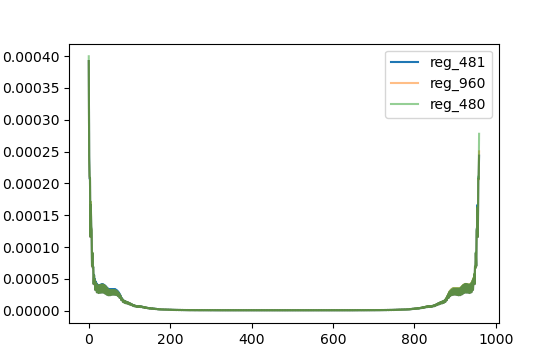

In [49]:
xgrid = 960
plt.plot(range(xgrid), mse481[0:xgrid],label='reg_481')
plt.plot(range(xgrid), mse960[0:xgrid], alpha=0.5,label='reg_960')
plt.plot(range(xgrid), mse480[0:xgrid], alpha=0.5,label='reg_480')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


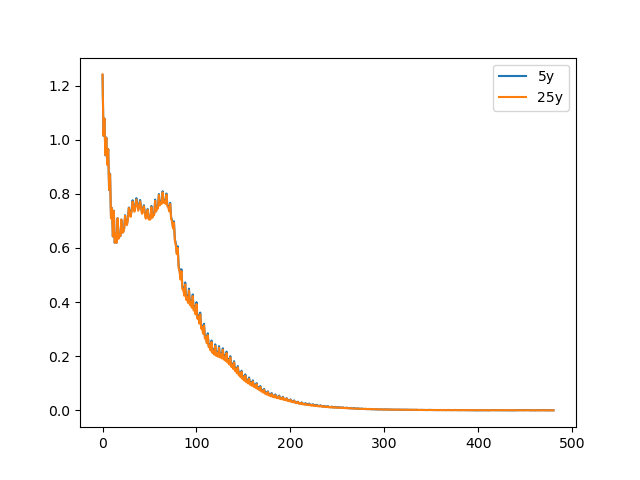

In [17]:
beta1 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/reg_loc_beta.npy')
plt.plot(range(481), beta1, label='5y')
plt.plot(range(481), beta, label='25y')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


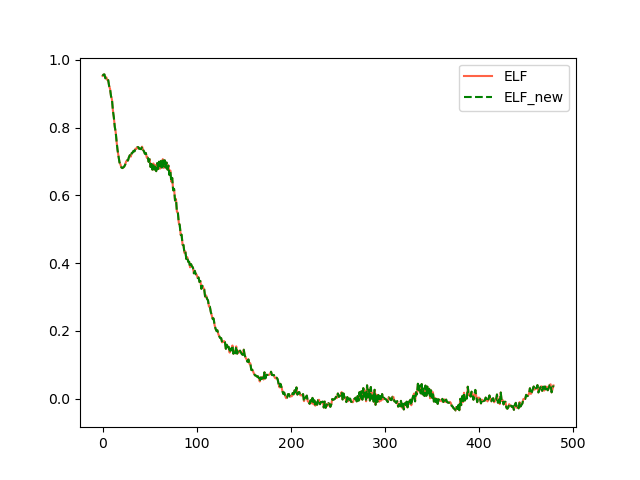

In [52]:
elf_new = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/cross_val/elf_check.npy')
elf = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/elf.npy')

plt.plot(range(loc_size), elf, color='tomato', label='ELF')
plt.plot(range(loc_size), elf_new, color='g', ls='--', label='ELF_new')

plt.legend()
plt.show()

#### Cross validation of old and new version of ELF codes

<IPython.core.display.Javascript object>


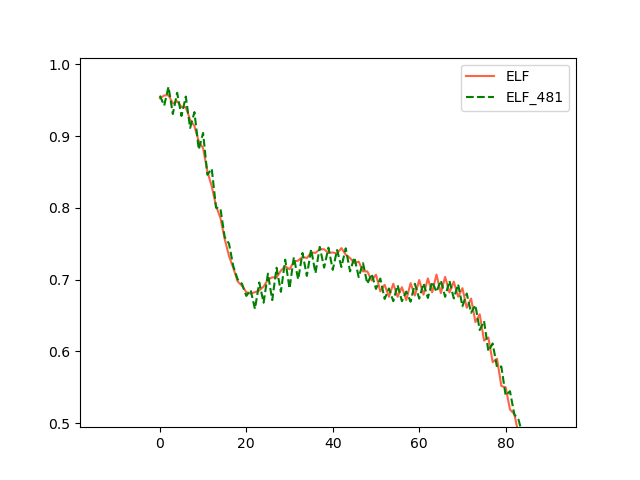

In [75]:
elf_new = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/debug_481/elf.npy')
elf = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/elf.npy')

plt.plot(range(loc_size), elf, color='tomato', label='ELF')
plt.plot(range(loc_size), elf_new[0:loc_size], color='g', ls='--', label='ELF_481')

plt.legend()
plt.show()

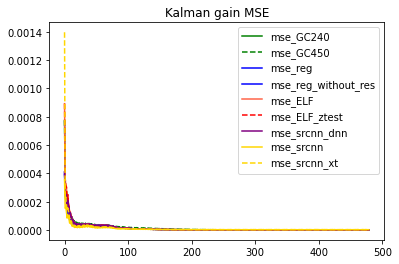

mean_mse_gc: 1.2453203198151572e-05
mean_mse_gc450: 1.4045629726532938e-05
mean_mse_reg: 1.0332700382193958e-05
mean_mse_reg_without_res: 1.1237450185785071e-05
mean_mse_srcnn_dnn: 1.1233569162936339e-05
mean_mse_elf: 1.2661586948138177e-05
mean_mse_elf_ztest: 1.2654464545347252e-05
mean_mse_srcnn: 7.912507725297623e-06
mean_mse_srcnn_xt: 1.121427369660886e-05


In [7]:
%matplotlib inline
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt


loc_size=480

MSE_gc = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/gc/mse_gc_240.npy')
mse_gc_op = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/gc/mse_gc_450.npy')
MSE_reg = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/mse_reg.npy')
mse_reg_1 = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/reg/distance_only/debug_481/without_res/mse_reg.npy')
MSE_srcnn_dnn = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_Kg_t/SRCNN_DNN/distance_only/debug_481/mse_srcnn_dnn.npy')
MSE_elf = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/debug_481/mse_elf.npy')
MSE_elf_ztest = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/ELF/distance_only/debug_481/mse_elf_ztest.npy')
MSE_srcnn = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_Kg_t/SRCNN_Dong/kg_no_shift/mse_srcnn.npy')
MSE_srcnn_xt = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_xt/SRCNN_Dong/mse_srcnn_xt.npy')

MSE_reg[loc_size+1:]=MSE_reg[loc_size-1:0:-1]

loc_size = 480
xx = range(loc_size)
plt.plot(xx, MSE_gc[0:loc_size],color='g', label='mse_GC240')
plt.plot(xx, mse_gc_op[0:loc_size],color='g', ls='--', label='mse_GC450')
plt.plot(xx, MSE_reg[0:loc_size],color='b', label='mse_reg')
plt.plot(xx, mse_reg_1[0:loc_size],color='b', label='mse_reg_without_res')
plt.plot(xx, MSE_elf[0:loc_size], color='tomato',label='mse_ELF')
plt.plot(xx, MSE_elf_ztest[0:loc_size], color='r',ls='--', label='mse_ELF_ztest')
plt.plot(xx, MSE_srcnn_dnn[0:loc_size], color='purple', label='mse_srcnn_dnn')
plt.plot(xx, MSE_srcnn[0:loc_size], color='gold', label='mse_srcnn')
plt.plot(xx, MSE_srcnn_xt[0:loc_size], color='gold', ls='--', label='mse_srcnn_xt')
plt.legend()
# plt.ylim(0,0.0005)
plt.title('Kalman gain MSE')
plt.show()

print('mean_mse_gc:',np.mean(MSE_gc))
print('mean_mse_gc450:',np.mean(mse_gc_op))
print('mean_mse_reg:',np.mean(MSE_reg))
print('mean_mse_reg_without_res:',np.mean(mse_reg_1))
print('mean_mse_srcnn_dnn:',np.mean(MSE_srcnn_dnn))
print('mean_mse_elf:',np.mean(MSE_elf))
print('mean_mse_elf_ztest:',np.mean(MSE_elf_ztest))
print('mean_mse_srcnn:',np.mean(MSE_srcnn))
print('mean_mse_srcnn_xt:',np.mean(MSE_srcnn_xt))


In [8]:
MSE_reg.shape

(960,)

In [9]:
np.arange(5)[-1:0:-1]

array([4, 3, 2, 1])

In [127]:
srcnn_dnn_static = np.load('/Users/ree/Documents/DataAssimilization/AI_localization/L05/server/inf1050_loc240/train/CNN/Loss_Kg_t/SRCNN_DNN/distance_only/debug_481/static/mse_srcnn_dnn.npy')
np.mean(srcnn_dnn_static)

1.1237924059105661e-05

<IPython.core.display.Javascript object>


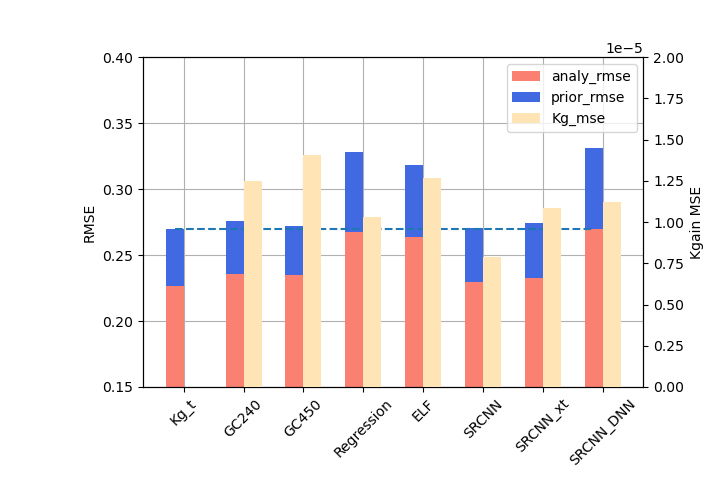

In [66]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


columns = ('Kg_t', 'GC240', 'GC450', 'Regression', 'ELF','ELF_ztest','SRCNN_DNN')
colors = ['salmon', 'royalblue']
labels = ['analy_rmse','prior_rmse']

gainmse = np.array([0, 1.248E-05, 1.405E-05, 1.033E-05, 1.268E-05, 7.913E-06, 1.085E-05, 1.119E-05])

data = np.array([[0.226774, 0.235484, 0.235000, 0.267683, 0.263531, 0.229852, 0.232995, 0.269520],
        [0.269421, 0.275636, 0.271753, 0.328089, 0.318180, 0.270162, 0.274439, 0.330872]])


# Get some pastel shades for the colors
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.3

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(index, np.tile(data[1,0],(len(index),1)),'--', zorder=6)
bars = []
data[1,:] = data[1,:] - data[0,:]
for row in range(n_rows):
    bars.append(ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row], label=labels[row], zorder=row+2))
    y_offset = y_offset + data[row]

ax2 = ax.twinx()
bars.append(ax2.bar(index+0.3, gainmse, bar_width, color='moccasin', label='Kg_mse', zorder=3))

ax.grid(zorder=0)
ax.set_ylim(0.15,0.4)
ax2.set_ylim(0,2E-5)
labs = [bar.get_label() for bar in bars]
ax.legend(bars, labs, loc=0)
ax.set_xticks(index+0.15)
ax.set_xticklabels( columns, rotation=45)
ax.set_ylabel('RMSE')
ax2.set_ylabel('Kgain MSE')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.show()
plt.savefig('methods_compare.png')
